# **Global-Superstore**

In [209]:
#libraries used

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [210]:
#take dataset from drive
from google.colab import drive
drive.mount('/content/drive')

# Use pd.read_excel to read Excel files
df = pd.read_excel('/content/drive/MyDrive/Global-Superstore.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Data Exploration

In [159]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Row ID         Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891 2012-07-31 2012-07-31      Same Day    RH-19495   
1   26341    IN-2013-77878 2013-02-05 2013-02-07  Second Class    JR-16210   
2   25330    IN-2013-71249 2013-10-17 2013-10-18   First Class    CR-12730   
3   13524  ES-2013-1579342 2013-01-28 2013-01-30   First Class    KM-16375   
4   47221     SG-2013-4320 2013-11-05 2013-11-06      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10

In [160]:
# Get information about the dataset
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  

In [161]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [162]:
# Display data types of each column
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object


In [163]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['YearMonth'] = df['Order Date'].dt.to_period('M')

In [164]:
# Aggregate profit by Year-Month
monthly_profit = df.groupby('YearMonth')['Profit'].sum().reset_index()

# Convert 'YearMonth' back to datetime for plotting
monthly_profit['YearMonth'] = monthly_profit['YearMonth'].dt.to_timestamp()

# 2. Data Visualization

## `Bar Plots`

<ipython-input-171-09c3c41ceb38>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=df, estimator='mean', palette='viridis')


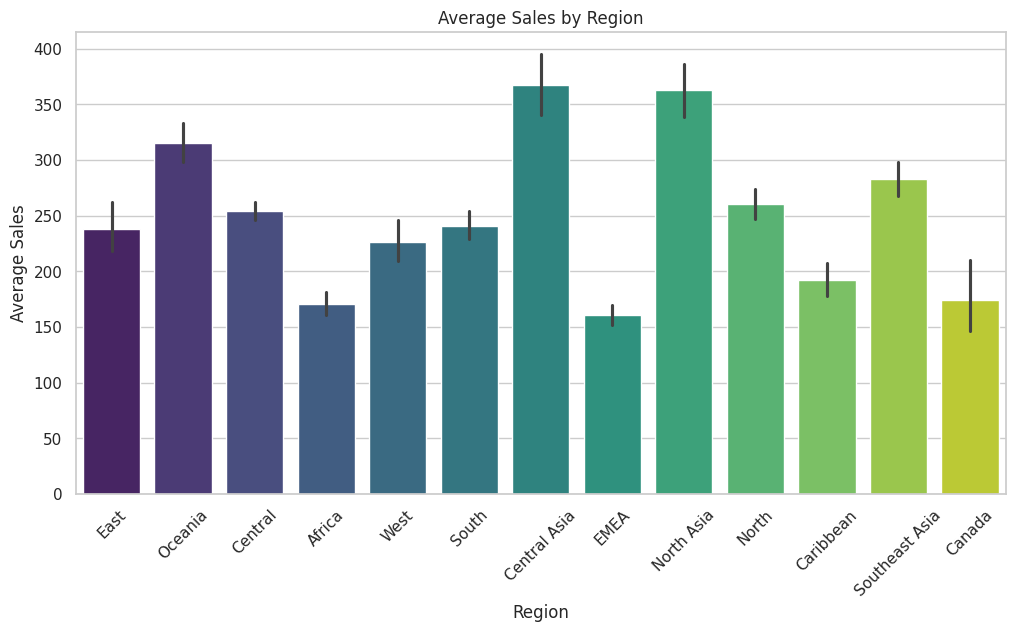

In [171]:
# Average Sales by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales', data=df, estimator='mean', palette='viridis')
plt.title('Average Sales by Region')
plt.xlabel('Region')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

- **Regional Disparity:** Significant variation in average sales across regions.
- **High-Performing Regions:** South and Central Asia show notably higher average sales.
- **Low-Performing Regions:** East, Oceania, Central, and Africa exhibit lower average sales.
- **Data Variability:** Error bars indicate varying sales dispersion. South and Central Asia have smaller error bars, suggesting less variability.

<ipython-input-172-48e1156eef84>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Profit', data=df, estimator='mean', palette='viridis')


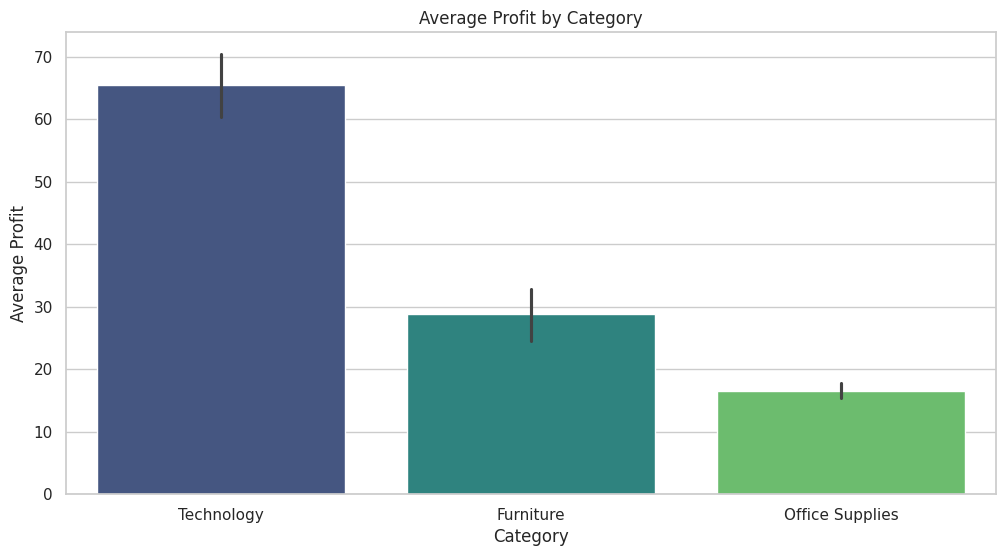

In [172]:
# Average Profit by Category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Profit', data=df, estimator='mean', palette='viridis')
plt.title('Average Profit by Category')
plt.xlabel('Category')
plt.ylabel('Average Profit')
plt.show()


- **Technology:** Highest average profit among the three categories.
- **Furniture:** Second highest in average profit.
- **Office Supplies:** Lowest average profit.

<ipython-input-215-54a14f7d4167>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Profit', data=monthly_profit_by_month, palette='viridis')


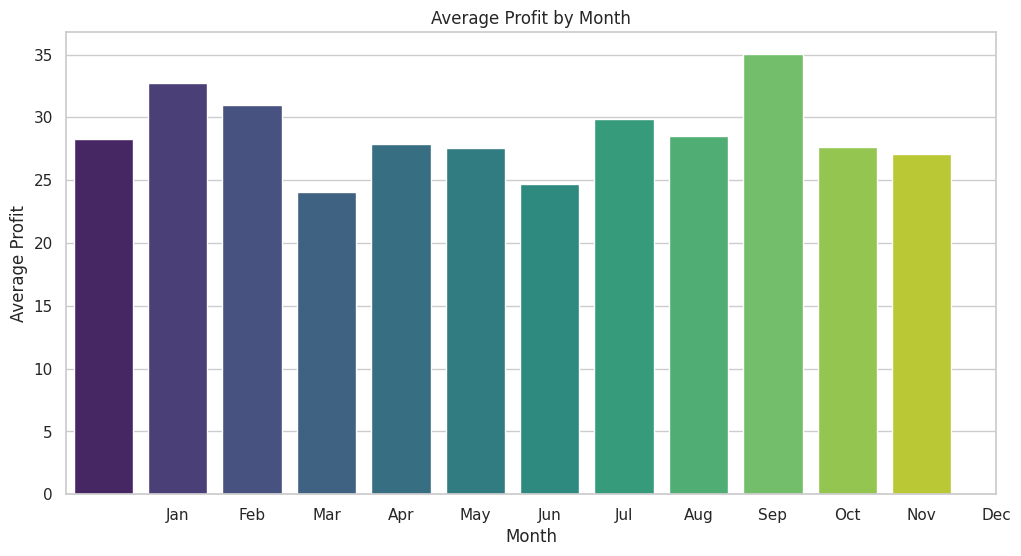

In [215]:
# Extract month for seasonal analysis
df['Month'] = df['Order Date'].dt.month
monthly_profit_by_month = df.groupby('Month')['Profit'].mean().reset_index()

# Bar plot of Average Monthly Profit
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Profit', data=monthly_profit_by_month, palette='viridis')
plt.title('Average Profit by Month')
plt.xlabel('Month')
plt.ylabel('Average Profit')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


- **Seasonal Fluctuations:** The graph shows a clear seasonal pattern in average profit.
- **Peak Profit:** September and October have the highest average profits, with September as the peak month.
- **Low Profit:** January to March consistently shows lower average profits.
- **Steady Increase:** Average profit increases from April, peaking in September and October.
- **Decline:** After the peak, profits decline in November and December.


## `Heatmaps`

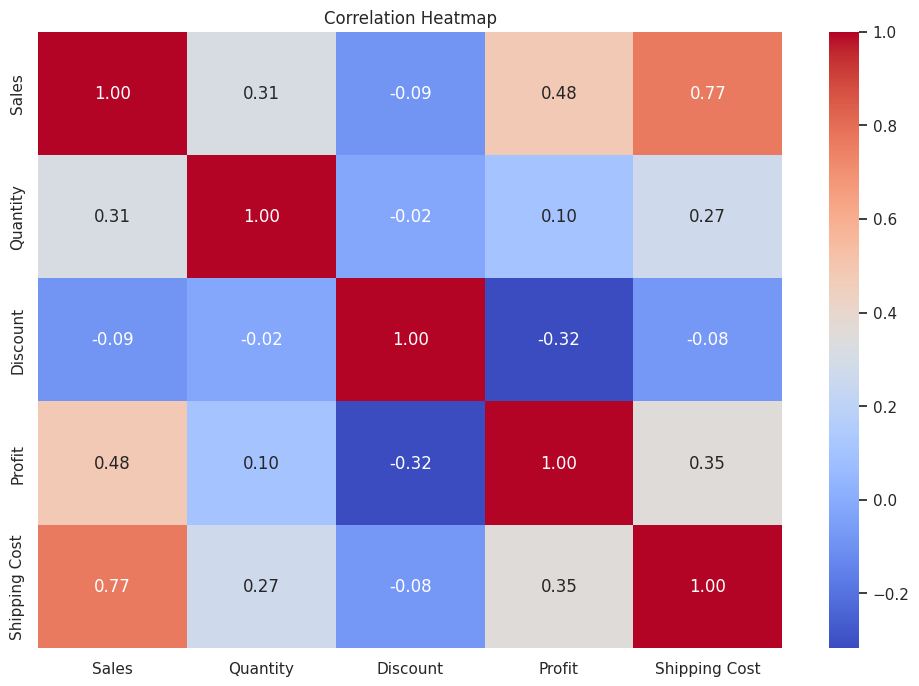

In [175]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



1. **Sales and Shipping Cost**
   - **Correlation: 0.77**
   - There's a strong positive relationship, meaning as sales increase, shipping costs also increase significantly.

2. **Sales and Profit**
   - **Correlation: 0.48**
   - Moderate positive relationship; higher sales generally lead to higher profits.

3. **Profit and Discount**
   - **Correlation: -0.32**
   - Moderate negative relationship; increasing discounts tends to reduce profits.

4. **Sales and Quantity**
   - **Correlation: 0.31**
   - Moderate positive relationship; more quantity sold usually means more sales.

5. **Quantity and Profit**
   - **Correlation: 0.10**
   - Weak positive relationship; slight tendency for profit to rise with quantity.

6. **Shipping Cost and Profit**
   - **Correlation: 0.35**
   - Moderate positive relationship; higher shipping costs are linked with higher profits.

Overall, the heatmap shows that sales and shipping costs are closely linked, while discounts negatively impact profits. The other variables have weaker or moderate correlations.

## `Pie Charts`

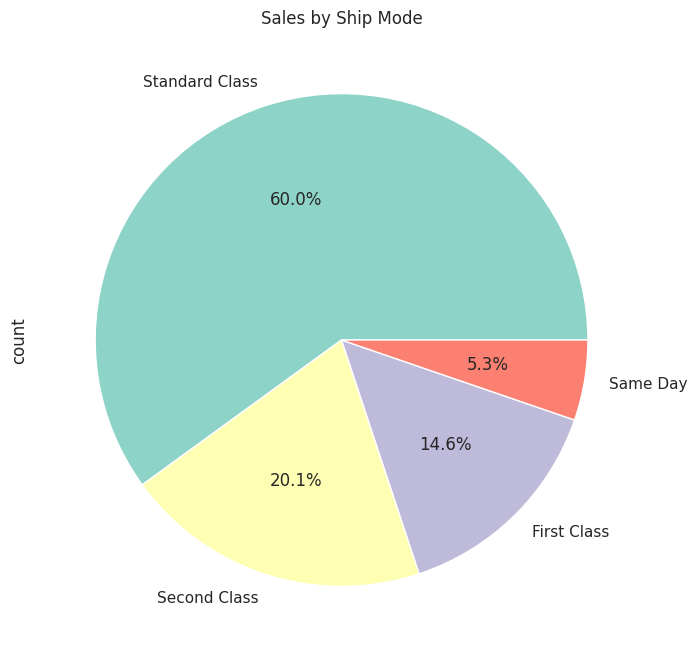

In [176]:
# Pie chart of Sales by Ship Mode
plt.figure(figsize=(8, 8))
df['Ship Mode'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Sales by Ship Mode')
plt.show()


1. **Standard Class:**
   - **Share:** 60%
   - **Dominance:** This is the most utilized shipping method, significantly surpassing others in sales contribution.
2. **Second Class:**
   - **Share:** 20.1%
   - **Position:** The second-most preferred option, accounting for a notable portion of sales.
3. **First Class:**
   - **Share:** 14.6%
   - **Usage:** Although less common than Standard and Second Class, it still represents a significant portion of sales.
4. **Same Day:**
   - **Share:** 5.3%
   - **Size:** The least used shipping method, with the smallest sales share.

- **Customer Preference:** The high percentage of Standard Class sales suggests that customers prioritize this option, possibly due to a good balance between cost and delivery time.
- **Cost Consideration:** The lower shares for First Class and Same Day deliveries might indicate that customers find these options too expensive or unnecessary for their needs.
- **Urgency and Cost Sensitivity:** The relatively low usage of Same Day delivery suggests that customers may not frequently require urgent deliveries or find the cost-benefit ratio unfavorable.


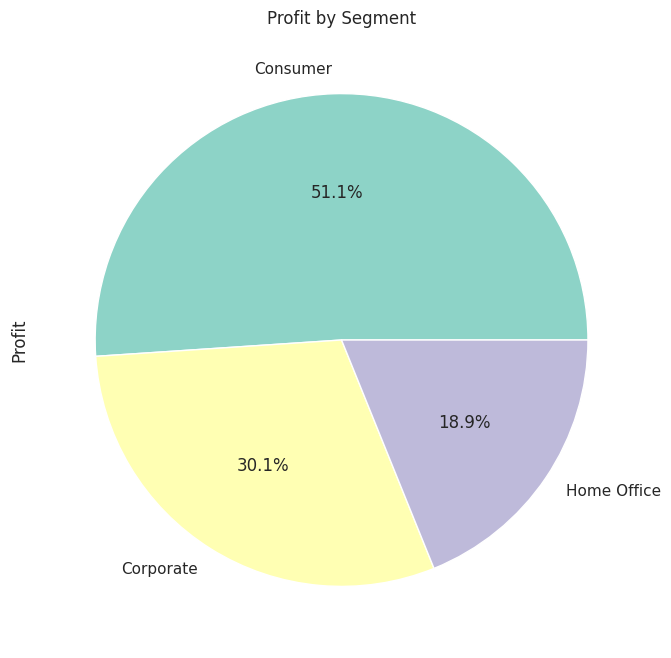

In [177]:
# Pie chart of Profit by Segment
plt.figure(figsize=(8, 8))
df.groupby('Segment')['Profit'].sum().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Profit by Segment')
plt.show()


1. **Consumer Segment:**
   - **Share:** 51.1%
   - **Profitability:** The most significant contributor to total profit, indicating strong performance in this segment.
2. **Corporate Segment:**
   - **Share:** 30.1%
   - **Profitability:** The second-largest contributor, showing substantial profit generation but less than the Consumer segment.
3. **Home Office Segment:**
   - **Share:** 18.9%
   - **Profitability:** The smallest contributor to total profit, reflecting a lower profit margin compared to the other two segments.


- **Dominance of Consumer Segment:** The Consumer segment's substantial contribution highlights its importance as the primary profit driver.
- **Relative Performance:** While both Corporate and Home Office segments are profitable, their contributions are lower compared to the Consumer segment, suggesting potential areas for improvement or strategic focus.
- **Strategic Focus:** Emphasis on enhancing profitability in the Home Office and Corporate segments could be beneficial for balanced growth.


## `Trend Analysis`

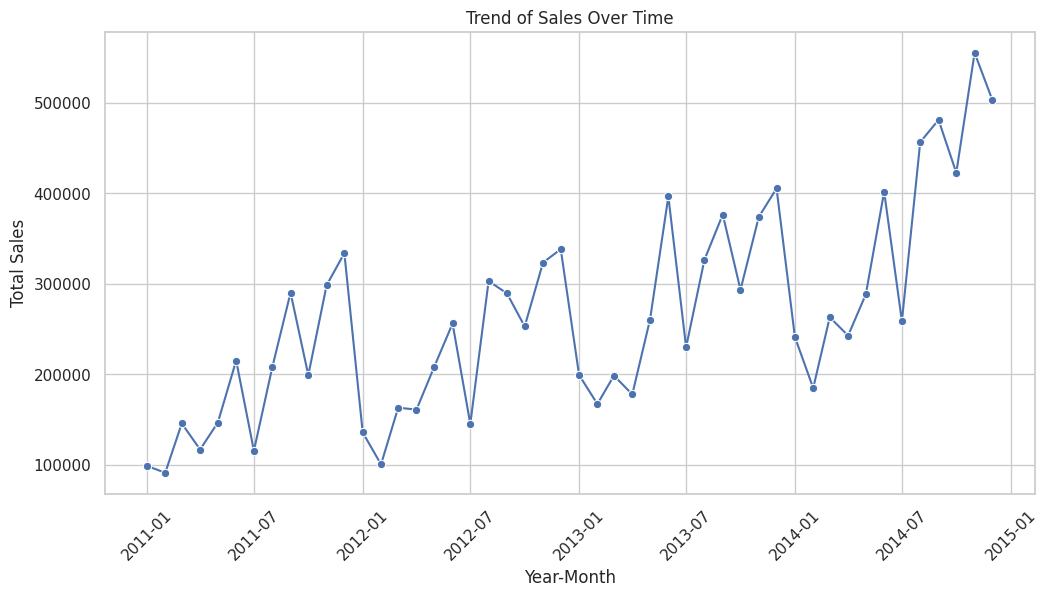

In [178]:
# Trend of Sales Over Time
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()
# Convert YearMonth to datetime objects
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Sales', data=monthly_sales, marker='o')
plt.title('Trend of Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

Specific Period Analysis:
1. **2011:**
   - **Early 2011:** Starts with low profits, peaking mid-year.
   - **Late 2011:** A sharp decline towards the year's end.
   
2. **2012:**
   - **Early 2012:** Recovery and a peak early in the year.
   - **Mid to Late 2012:** Another decline followed by a gradual recovery.

3. **2013:**
   - **Early to Mid 2013:** Steady profit increase with some peaks.
   - **Late 2013:** Noticeable dip towards the year's end.

4. **2014:**
   - **Early 2014:** Starts with a decline, then gradually recovers.
   - **Mid to Late 2014:** Significant growth with multiple peaks, hitting some of the highest values.

5. **2015:**
   - **Early 2015:** High profit values with a slight dip at the year's start.

- Significant profit growth from 2011 to 2015, despite monthly volatility.
- Understanding the causes of fluctuations can help achieve more consistent growth.

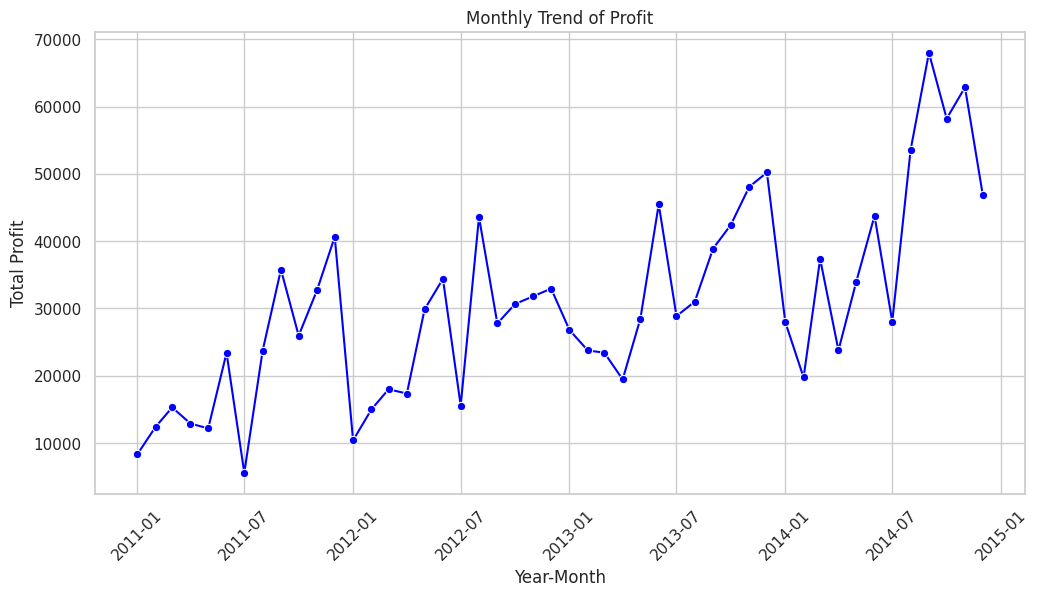

In [179]:
# Line plot of Profit Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Profit', data=monthly_profit, marker='o', color='blue')
plt.title('Monthly Trend of Profit')
plt.xlabel('Year-Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Specific Period Analysis:
1. **2011:**
   - **Early 2011:** Profits begin low, then rise, peaking around mid-year.
   - **Late 2011:** A sharp decline in profits occurs towards the year's end.

2. **2012:**
   - **Early 2012:** Profits recover, peaking early in the year.
   - **Mid to Late 2012:** Another decline followed by a gradual recovery by year's end.

3. **2013:**
   - **Early to Mid 2013:** Profits steadily increase, with a few peaks.
   - **Late 2013:** A noticeable dip in profits occurs towards the year's end.

4. **2014:**
   - **Early 2014:** Starts with a decline, followed by a gradual recovery.
   - **Mid to Late 2014:** Profits grow significantly, with multiple peaks reaching some of the highest values.

5. **2015:**
   - **Early 2015:** The data ends with high profit values, though there's a slight dip at the year's start.

The business experienced significant profit growth from 2011 to 2015, despite the monthly volatility. Understanding the causes of these fluctuations, such as market conditions, seasonal effects, or business decisions, could help in achieving more consistent growth.

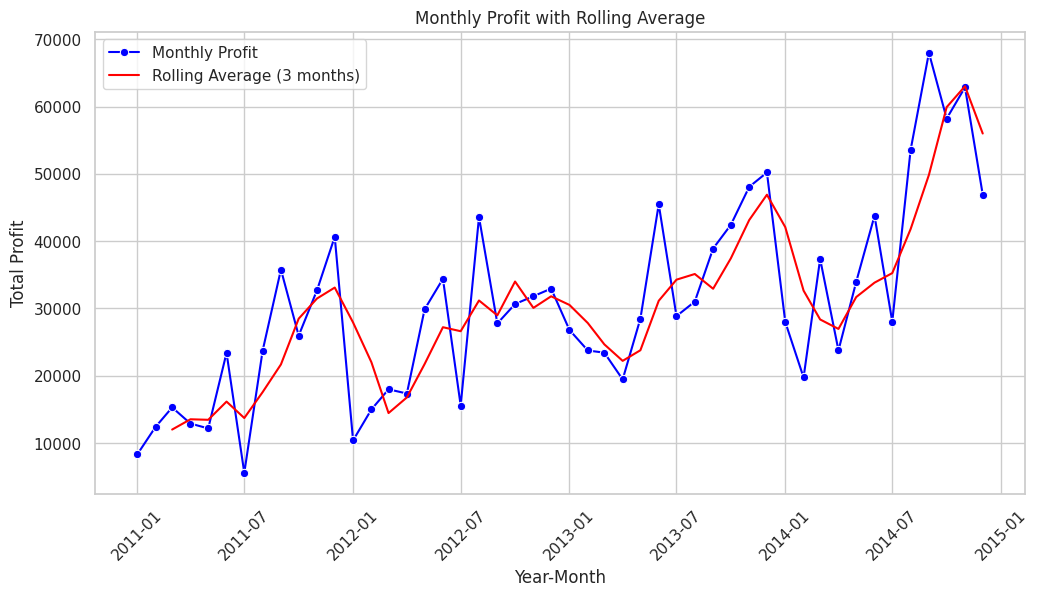

In [180]:
# Calculate a rolling average (e.g., 3 months)
monthly_profit['RollingAvg'] = monthly_profit['Profit'].rolling(window=3).mean()

# Line plot with Rolling Average
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Profit', data=monthly_profit, marker='o', label='Monthly Profit', color='blue')
sns.lineplot(x='YearMonth', y='RollingAvg', data=monthly_profit, label='Rolling Average (3 months)', color='red')
plt.title('Monthly Profit with Rolling Average')
plt.xlabel('Year-Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

* Early Period (2011-2012): A gradual rise in profits with peaks and troughs, showing early growth and adjustment.

* Mid Period (2012-2013): Mixed patterns with sharp changes, indicating instability.
* Late Period (2013-2015): More consistent growth, with higher peaks and fewer troughs.

* Highest Peaks: Significant peaks around mid-2011, early 2012, mid-2013, and late 2014, possibly due to successful events or seasonal highs.

* The business has shown consistent growth from 2011 to 2015, despite short-term volatility.

* The rolling average line highlights the positive trend by smoothing out the noise.

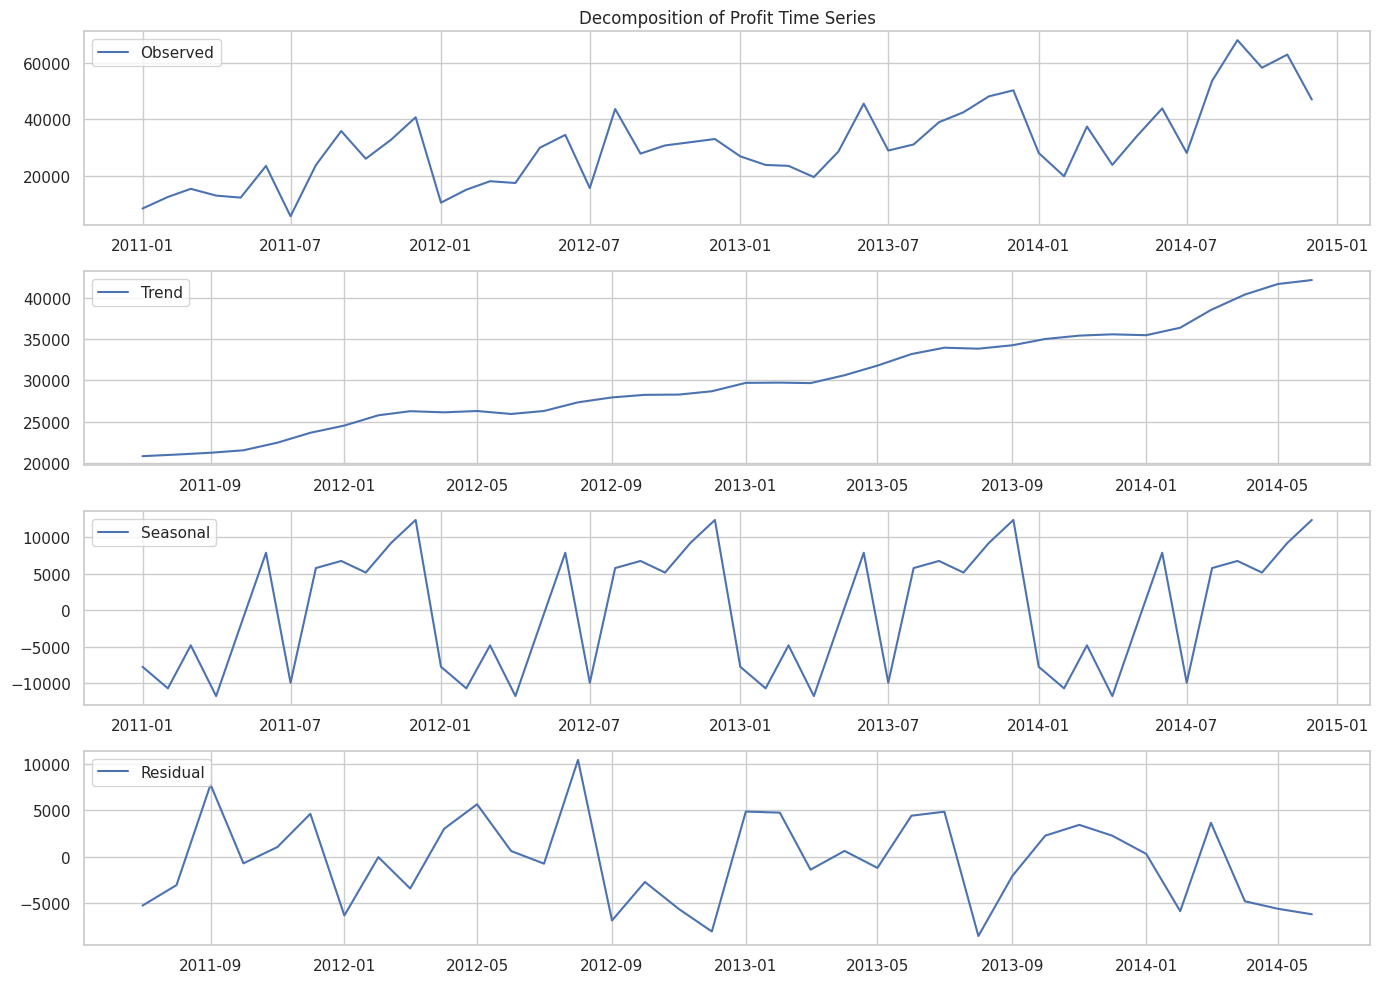

In [181]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set 'YearMonth' as index
monthly_profit.set_index('YearMonth', inplace=True)

# Decompose the time series
decomposition = seasonal_decompose(monthly_profit['Profit'], model='additive')

# Plot the decomposed components
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.title('Decomposition of Profit Time Series')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

The decomposition of the profit time series into observed, trend, seasonal, and residual components reveals various patterns and insights:

### 1. **Observed**
   - **Maximum**: The highest profit value occurs around mid-2014.
   - **Minimum**: The lowest profit value is observed in early 2011.
   - **Summary**: This component shows the actual profit data over time, including all its variations.

### 2. **Trend**
   - **Maximum**: The trend peaks towards the end of 2014.
   - **Minimum**: The lowest trend value is in early 2011.
   - **Summary**: The trend line represents the overall long-term movement, indicating an upward trend in profits over the period.

### 3. **Seasonal**
   - **Maximum**: Peaks in the seasonal component are seen around mid-2011 and early 2012.
   - **Minimum**: The lowest seasonal values occur in early 2011 and mid-2012.
   - **Summary**: This component highlights the regular, repeating patterns in the data, likely due to seasonal effects.

### 4. **Residual**
   - **Maximum**: The highest residual value is found in early 2011.
   - **Minimum**: The lowest residual value appears around mid-2013.
   - **Summary**: Residuals capture the remaining fluctuations after removing trend and seasonal effects, representing irregular or random variations.

These insights help in understanding the underlying trends, seasonal patterns, and irregularities in the profit data. For exact values and dates of maxima and minima, a detailed analysis of the dataset would be required.

## `Most Profitable Products`

In [190]:
# Aggregate sales and profit by product
product_profit = df.groupby('Product Name').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Calculate profit margin
product_profit['Profit Margin'] = product_profit['Profit'] / product_profit['Sales']

# Sort by profit margin
product_profit_sorted = product_profit.sort_values(by='Profit Margin', ascending=False)

# Select top 10 most profitable products
top_products = product_profit_sorted.head(10)

# Print the top 10 most profitable products
print(top_products)

                                           Product Name    Sales     Profit  \
3233                   Southworth Structures Collection    72.80    36.4000   
3457             Tops Green Bar Computer Printout Paper   342.58   171.2900   
346                                           Avery 475   266.40   133.2000   
178   Adams Telephone Message Book w/Frequently-Call...   223.44   111.7200   
3587                                         Xerox 1890   244.70   122.3500   
867   Canon imageCLASS MF7460 Monochrome Digital Las...  3991.98  1995.9900   
373                                             Avery 5     5.76     2.8224   
2740        Personal Creations Ink Jet Cards and Labels   321.44   157.5056   
3617                                         Xerox 1918   155.04    75.9696   
3358           Strathmore #10 Envelopes, Ultimate White   632.52   309.9348   

      Profit Margin  
3233           0.50  
3457           0.50  
346            0.50  
178            0.50  
3587           0.50 

<ipython-input-189-f22e3d5afcd8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit Margin', y='Product Name', data=top_products, palette='viridis')


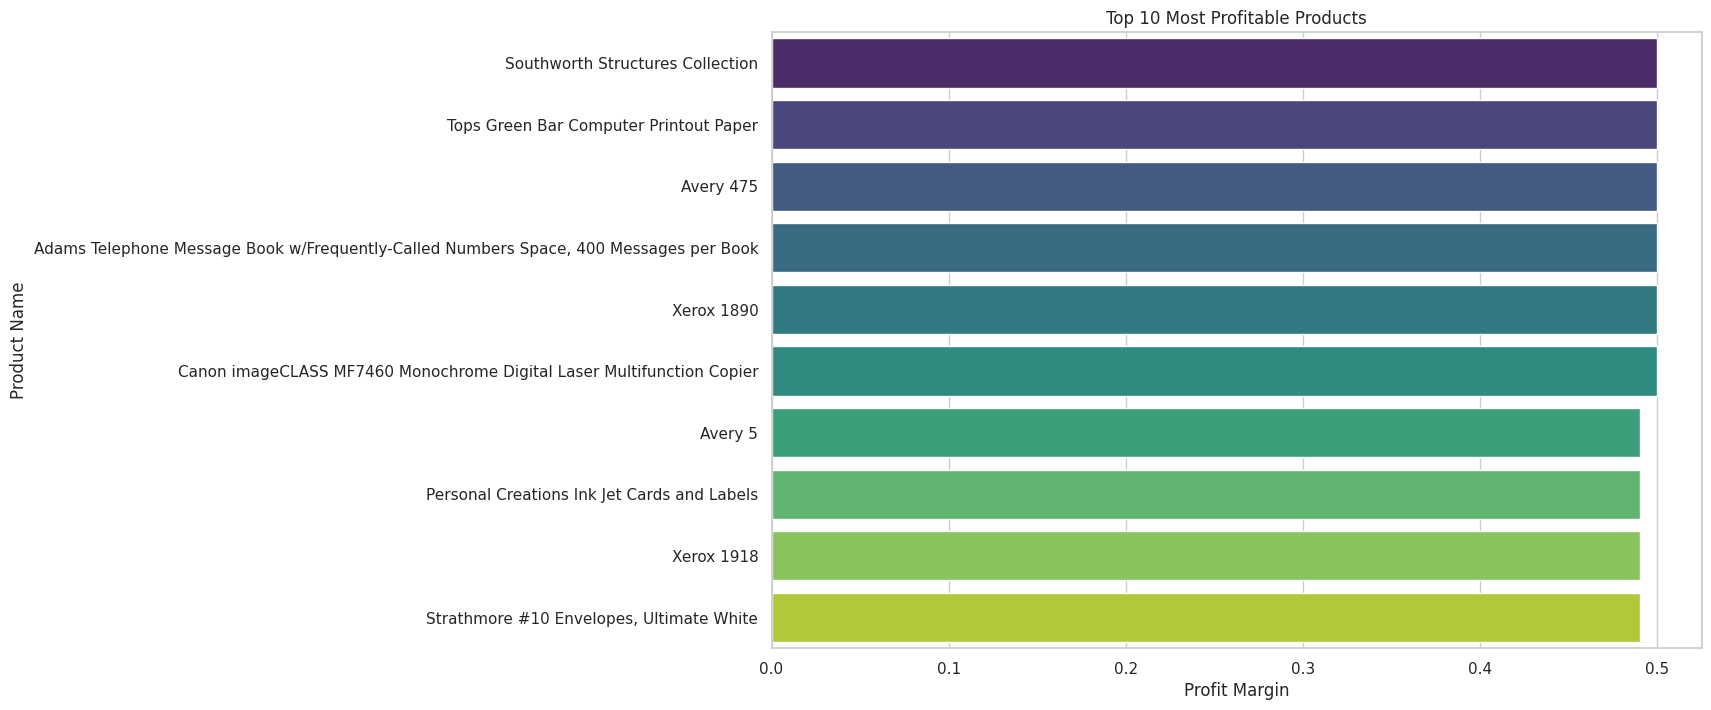

In [189]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='Profit Margin', y='Product Name', data=top_products, palette='viridis')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Profit Margin')
plt.ylabel('Product Name')
plt.show()

The chart illustrates the top 10 products with the highest profit margins, indicating their profitability in relation to their cost:

* Southworth Structures Collection: Leads with the highest profit margin, close to 0.5, showcasing significant profitability.

* Tops Green Bar Computer Printout Paper: Similarly profitable, with a margin comparable to the top product.

* Avery 475 and Adams Telephone Message Book w/Frequently-Called Numbers Space, 400 Messages per Book: Both products exhibit high profit margins, just slightly below the top two.

* Xerox 1890 and Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier: These products are in the middle of the top profitable range, indicating strong margins.

* Avery 5 and Personal Creations Ink Jet Cards and Labels: Show similar profit margins, reflecting good profitability.

* Xerox 1918 and Strathmore #10 Envelopes, Ultimate White: Complete the list, maintaining strong profit margins.


This analysis highlights that office supplies, particularly paper products and office equipment, are among the most profitable items. These products offer substantial profit margins, making them crucial for maximizing profitability. Prioritizing these items in inventory and marketing strategies can help enhance overall business performance.

## `Top Countries by Sales`


In [192]:
# Aggregate sales by country
country_sales = df.groupby('Country').agg({'Sales': 'sum'}).reset_index()

# Sort by sales in descending order
country_sales_sorted = country_sales.sort_values(by='Sales', ascending=False)

# Select top 10 countries by sales
top_countries = country_sales_sorted.head(10)

<ipython-input-194-3917ddd446d6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Country', data=top_countries, palette='coolwarm')


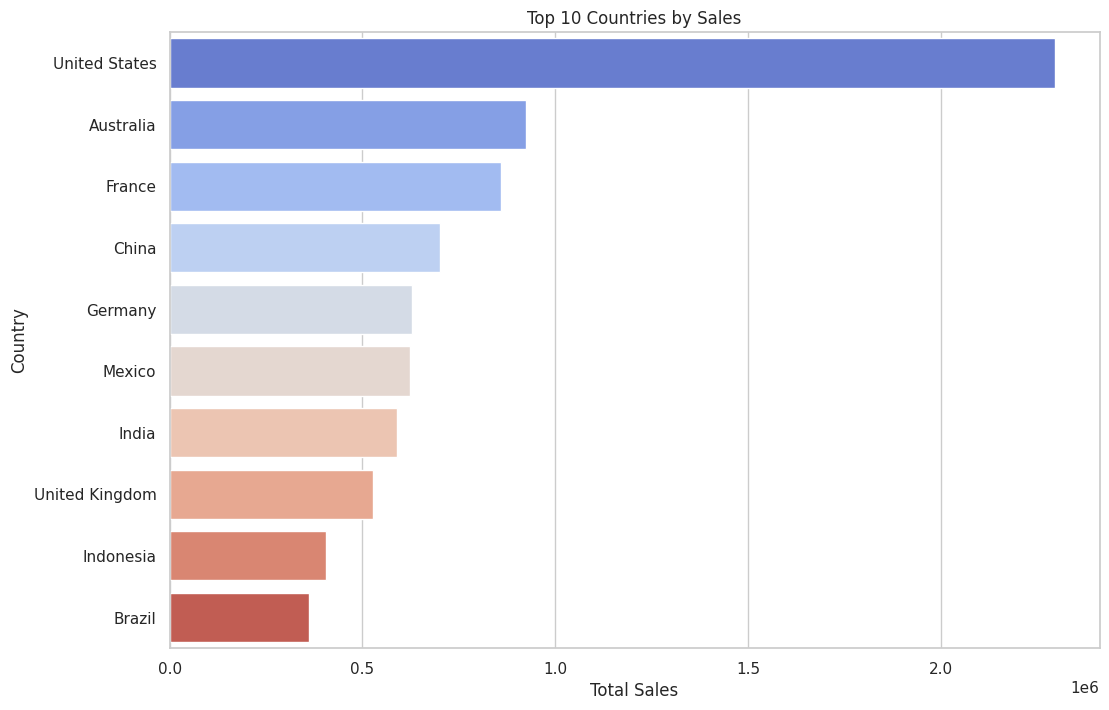

In [194]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Country', data=top_countries, palette='coolwarm')
plt.title('Top 10 Countries by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()

The chart highlights the top 10 countries by total sales, providing a clear view of the key markets:

* United States: Dominates the chart with the highest sales, exceeding 2 million in total sales, indicating a strong market presence.

* Australia: Second highest, with sales slightly above 1 million, showing a solid market performance.

* France and China: Both have substantial sales around the 900,000 mark, with
France slightly ahead, reflecting strong European and Asian market engagement.

* Germany: Midway in the rankings with sales around 700,000, indicating steady market activity.

* Mexico, India, and the United Kingdom: These countries have similar sales figures, ranging from 600,000 to 700,000, showing significant but relatively comparable contributions to overall sales.

* Indonesia and Brazil: Complete the top 10, with sales just below 600,000, indicating growing markets.

This analysis underscores the United States as the largest market by a wide margin, with strong sales also coming from Australia, France, and China. The remaining countries contribute significantly, indicating a well-distributed international market reach.

## `Lowest Profit Products`

In [196]:
# Aggregate sales and profit by product
product_profit = df.groupby('Product Name').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Sort by profit in ascending order
product_profit_sorted = product_profit.sort_values(by='Profit', ascending=True)

# Select bottom 10 products by profit
lowest_profit_products = product_profit_sorted.head(10)

<ipython-input-213-fb91926afa0b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='Product Name', data=lowest_profit_products, palette='rocket')


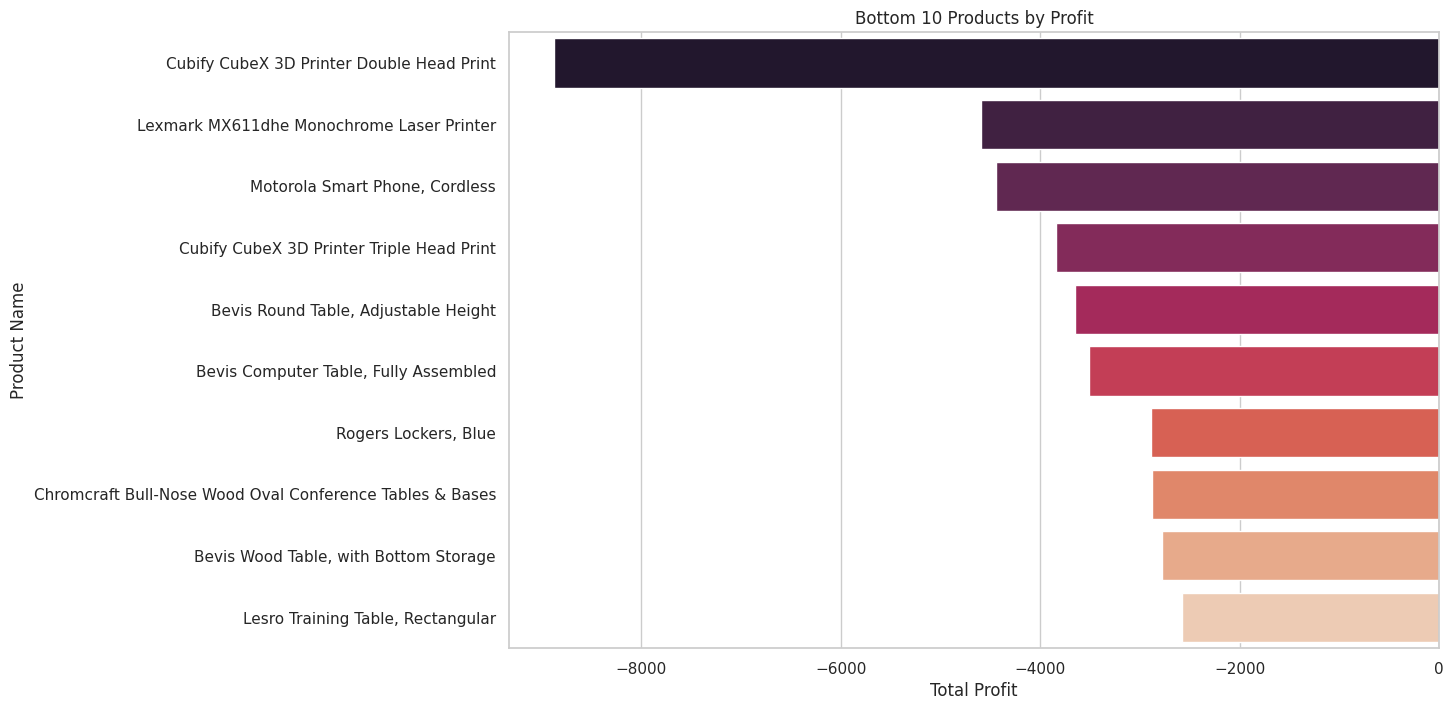

In [213]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Profit', y='Product Name', data=lowest_profit_products, palette='rocket')
plt.title('Bottom 10 Products by Profit')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.show()

The chart showcases the bottom 10 products in terms of profit, highlighting those that have incurred the most significant losses:

* Cubify CubeX 3D Printer Double Head Print: This product has the largest loss, with a total profit of around -$8000.

* Lexmark MX611dhe Monochrome Laser Printer: Follows closely with losses just below -$6000.

* Motorola Smart Phone, Cordless: Shows a loss near -$5000.

* Cubify CubeX 3D Printer Triple Head Print: Another major loss-making product, with losses above -$4000.

* Bevis Round Table, Adjustable Height and Bevis Computer Table, Fully Assembled: Each with losses around -$3000.

* Rogers Lockers, Blue and Chromcraft Bull-Nose Wood Oval Conference Tables & Bases: Show losses nearing -$2500.

* Bevis Wood Table, with Bottom Storage and Lesro Training Table, Rectangular: Each has losses slightly above -$2000.

This analysis reveals that 3D printers and certain furniture items, particularly tables, have been the most loss-making products, suggesting potential issues with cost management, pricing strategies, or market demand for these items

## `Which regions have the highest discounts?`

In [200]:
# Check for missing values in 'Discount' or 'Region'
df = df.dropna(subset=['Discount', 'Region'])

# Prepare data for analysis
region_discounts = df[['Region', 'Discount']]

In [201]:
# Calculate the average discount for each region
avg_discount_by_region = region_discounts.groupby('Region').agg({'Discount': 'mean'}).reset_index()
avg_discount_by_region = avg_discount_by_region.sort_values(by='Discount', ascending=False)

<ipython-input-202-bc049dc0668a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discount', y='Region', data=avg_discount_by_region, palette='viridis')


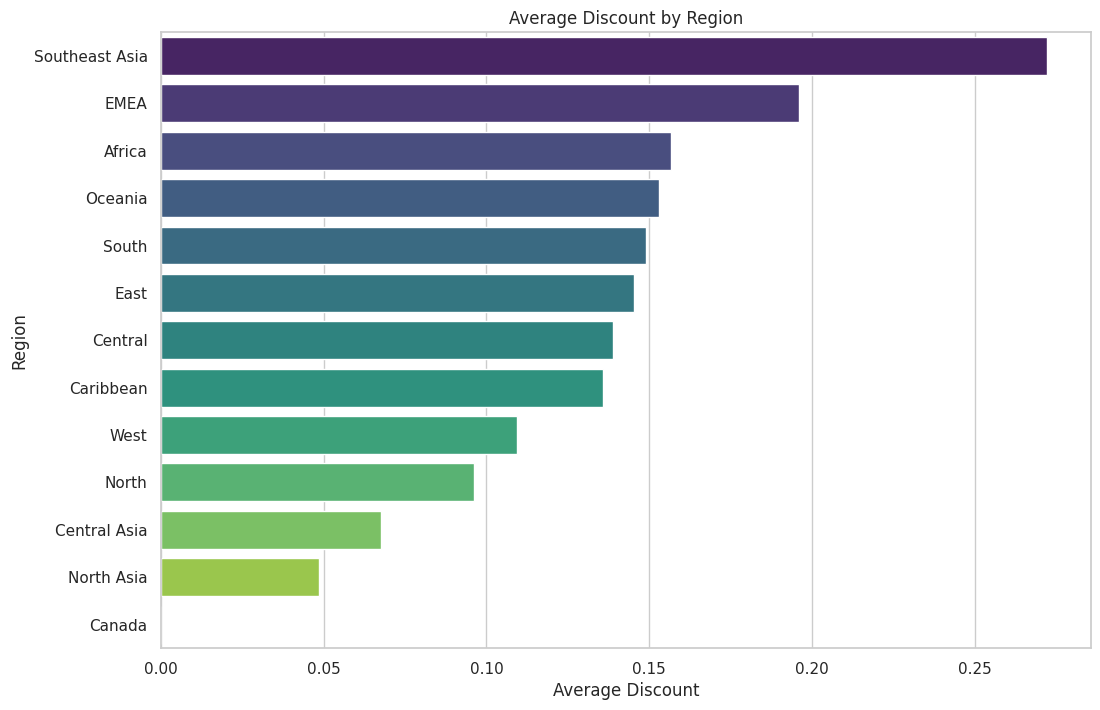

In [202]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Discount', y='Region', data=avg_discount_by_region, palette='viridis')
plt.title('Average Discount by Region')
plt.xlabel('Average Discount')
plt.ylabel('Region')
plt.show()

The horizontal bar chart shows the average discount offered in different regions:

- **Southeast Asia**: Leads with the highest average discount, about 25%.
- **EMEA (Europe, Middle East, and Africa)**: Follows with an average discount close to 20%.
- **Africa**: Offers an average discount around 18%.
- **Oceania**: Slightly less than Africa.
- **South**: Around 15% discount.
- **East**: Just below South.
- **Central**: Offers an average discount of about 12%.
- **Caribbean**: Close to 11%.
- **West**: Approximately 10%.
- **North**: Around 9%.
- **Central Asia**: About 7%.
- **North Asia**: Slightly above 5%.
- **Canada**: Provides the lowest average discount at about 3%.

This chart illustrates the variation in discount strategies across regions, with Southeast Asia offering the most significant discounts and Canada the least.

## `What's the most popular product category?`

In [204]:
# Prepare data for analysis
category_sales = df[['Category', 'Sales']]
category_quantity = df[['Category', 'Quantity']]

In [205]:
# Calculate total sales for each category
total_sales_by_category = category_sales.groupby('Category').agg({'Sales': 'sum'}).reset_index()
total_sales_by_category = total_sales_by_category.sort_values(by='Sales', ascending=False)

# Calculate total quantity for each category
total_quantity_by_category = category_quantity.groupby('Category').agg({'Quantity': 'sum'}).reset_index()
total_quantity_by_category = total_quantity_by_category.sort_values(by='Quantity', ascending=False)


<ipython-input-212-4b43628a699c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Category', data=total_sales_by_category, palette='coolwarm')


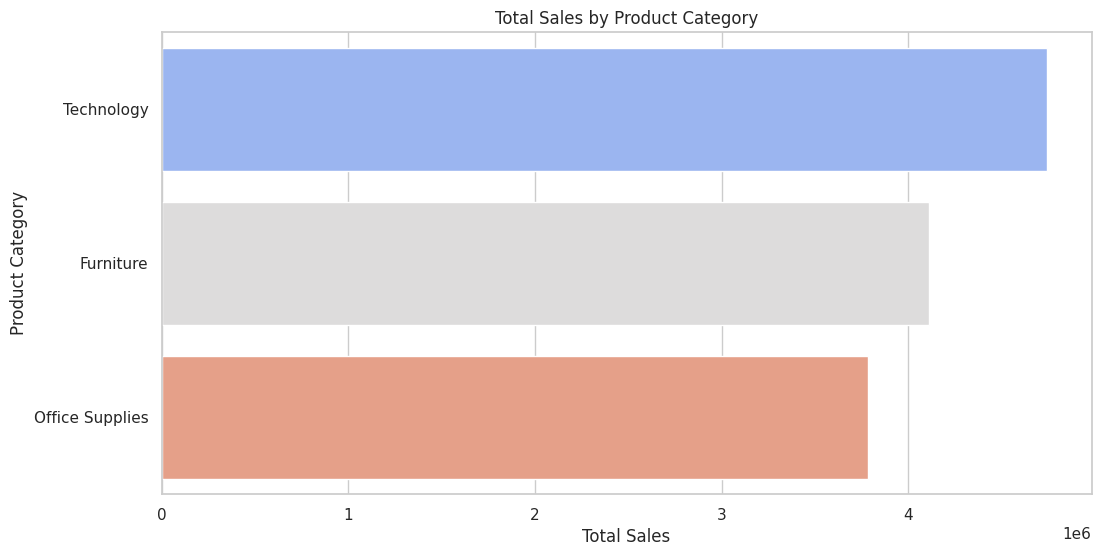

In [212]:
# Plot total sales by category
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Category', data=total_sales_by_category, palette='coolwarm')
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()

The horizontal bar chart shows the total sales for each product category. Here's the trend:

*   Technology: Leads with the highest sales, approaching 4 million, indicating its strong performance.

*   Office Supplies: Follows closely with sales near 3 million, showing significant contribution.

*   Furniture: Has slightly lower sales, just above 2.5 million, but still a key player.

<ipython-input-211-11aac89a7639>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='Category', data=total_quantity_by_category, palette='coolwarm')


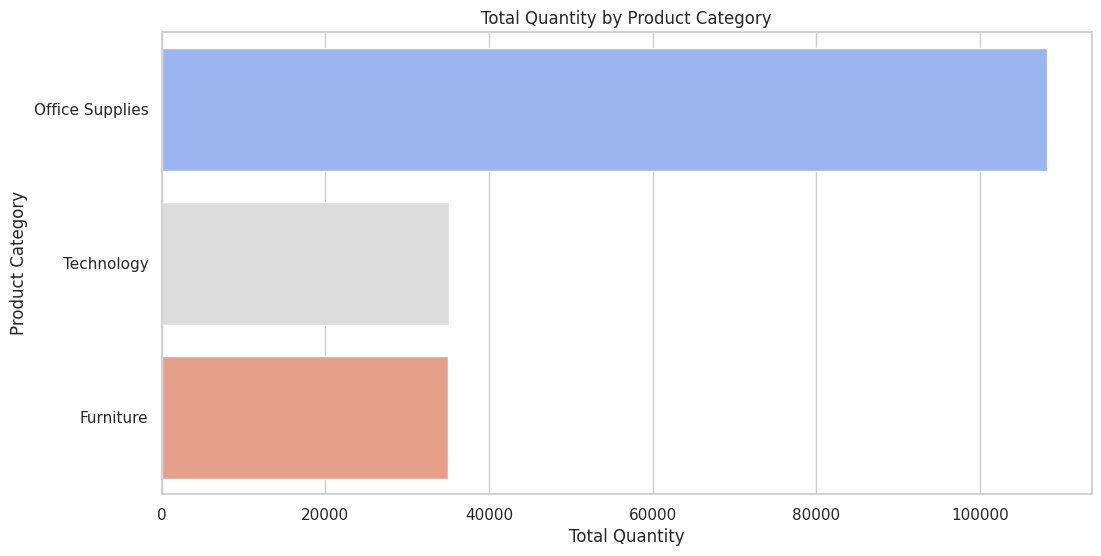

In [211]:
# Plot total quantity by category
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Category', data=total_quantity_by_category, palette='coolwarm')
plt.title('Total Quantity by Product Category')
plt.xlabel('Total Quantity')
plt.ylabel('Product Category')
plt.show()

The horizontal bar chart displays the total quantity of products sold across different categories. Here's the trend:

*   Office Supplies: Tops the chart with the highest quantity sold, surpassing 100,000 units.
*   Technology: Shows a significant quantity sold, around 60,000 units.
* Furniture: Has a lower quantity sold compared to the others, just below 40,000 units.
